# LSTM Language Model

Overfitted. Regularization Required

In [89]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

In [90]:
embedding_output_dims = 100
num_distinct_words = 20000
max_sequence_length = 300

##### Load Dataset

In [91]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
print(x_train.shape, x_test.shape)

(25000,) (25000,)


##### Pad sentences

In [92]:
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value = 0.0) 
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value = 0.0)

##### Define Model

In [93]:
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(30, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

##### Train Model

In [94]:
history = model.fit(padded_inputs, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 49s 151ms/step - loss: 0.4227 - accuracy: 0.8016 - val_loss: 0.3268 - val_accuracy: 0.8622
Epoch 2/10
313/313 [==============================] - 51s 164ms/step - loss: 0.2083 - accuracy: 0.9238 - val_loss: 0.2950 - val_accuracy: 0.8792
Epoch 3/10
313/313 [==============================] - 52s 165ms/step - loss: 0.1408 - accuracy: 0.9495 - val_loss: 0.3879 - val_accuracy: 0.8680
Epoch 4/10
313/313 [==============================] - 50s 160ms/step - loss: 0.0922 - accuracy: 0.9678 - val_loss: 0.4098 - val_accuracy: 0.8494
Epoch 5/10
313/313 [==============================] - 50s 161ms/step - loss: 0.0707 - accuracy: 0.9757 - val_loss: 0.4002 - val_accuracy: 0.8666
Epoch 6/10
313/313 [==============================] - 54s 173ms/step - loss: 0.0520 - accuracy: 0.9830 - val_loss: 0.4939 - val_accuracy: 0.8712
Epoch 7/10
313/313 [==============================] - 53s 169ms/step - loss: 0.0567 - accuracy: 0.9812 - val_loss: 0.5097 - val_ac

In [95]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

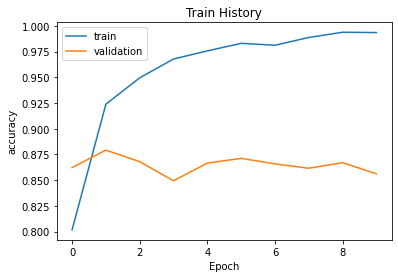

In [96]:
show_train_history(history,'accuracy','val_accuracy')

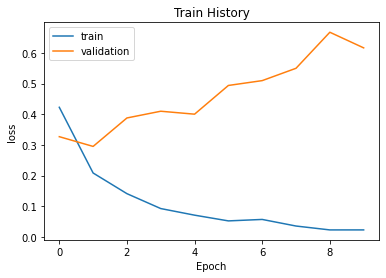

In [97]:
show_train_history(history,'loss','val_loss')

##### Evaluate

In [98]:
test_results = model.evaluate(padded_inputs_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.6580585241317749 - Accuracy: 85.07599830627441%


##### Predict

In [99]:
def get_sentence_vector(word_index, s):
    return [word_index[x] for x in s.split()]

def get_decoded_sentence(inverted_word_index, s):
    return inverted_word_index[s]

def predict_next_word(word_index, inverted_word_index, s):
    text = [get_sentence_vector(word_index, s)]
    padded_text = pad_sequences(text, maxlen=max_sequence_length, value = 0.0)
    return get_decoded_sentence(inverted_word_index, np.argmax(model.predict(padded_text[0])))

In [100]:
word_index = tf.keras.datasets.imdb.get_word_index()
inverted_word_index = dict((i, word) for (word, i) in word_index.items())

In [101]:
s = 'there is no sun and it is going to'
s = s+ ' '+predict_next_word(word_index, inverted_word_index, s)
print(s)
s = s+ ' '+predict_next_word(word_index, inverted_word_index, s)
print(s)
s = s+ ' '+predict_next_word(word_index, inverted_word_index, s)
print(s)
s = s+ ' '+predict_next_word(word_index, inverted_word_index, s)
print(s)

there is no sun and it is going to play
there is no sun and it is going to play watched
there is no sun and it is going to play watched together
there is no sun and it is going to play watched together effects
